<hr>

# Portrait of a lake's death

*by [Colas Droin](colasdroin.github.io) (EPFL), [Diana Zambelloni](https://www.linkedin.com/in/diana-zambelloni-0b346b155/en/?originalSubdomain=it) (EPFL), and [Carlos Vivar Rios](h4ck1ng.science) (h4cking.science).*

Project developed for the Jupyter Notebook Competition by [Wekeo](https://notebook.wekeo.eu/). MIT License 2022.
<hr>


## Abstract

In recent years, climate change has brought increasingly substantial effects on the land, including drought, which affects many countries worldwide in different ways, leading to catastrophic consequences for our ecosystem, including economic and social environmental disasters. Bodies of water represent one of the essential resources for life on the planet, which is why their disappearance should be of great concern to us. There have been many disappearing lakes recently, such as Chad Lake in Nigeria, Poopo Lake in Bolivia, Urma Lake in Iran, Jelenino in Poland, and many others. These include the complicated case of Acuelo Lagoon, an essential resource for the metropolitan city of Santiago de Chile, which unfortunately dried up entirely in May 2018.

In this project, we used remote sensing products delivered by the Sentinel-2 missions to assess the state of the lake from 2017 to 2022. After downloading all the data available in that period, we cropped the area of interest of the lake. Then we selected the images with enough quality to allow the segmentation and measurement of the total lake area in each image. This segmentation revealed a sharp drop in the entire lake's extension, leading to the absolute death of the lake around 2020. Finally, we performed an additional analysis of the lake's algae content to serve as a bioindicator of the water's quality. 

Public repositories of remote sensing products such as the ones provided by the Sentinel missions offer an excellent opportunity to monitor the impact of climate change on our environment. For Aculeo's lake could be too late, but real-time monitoring analysis of wetlands using satellite imagery can be used to predict critical situations that require urgent action by society. This technology can potentially become the tool that makes the difference between losing or saving our planet as we know it.

<hr>

## Notebook outline

* [1 - Introduction](#introduction)
* [2 - Analysis](#Analysis)
    * [2.1 - Products selection and downloading](#products_selection)
    * [2.2 - Products preprocessing](#products_preprocessing)
    * [2.3 - Lake segmentation](#lake_segmentation)
    * [2.4 - Lake dynamics](#lake_dynamics)
* [3 - Conclusions](#conclusions)



<hr>

## <a id='introduction'></a>1. Introduction

## Drought and climate change

In recent years, climate change has brought increasingly concrete effects on the land, including drought, which continues to affect many countries worldwide in different ways, leading to catastrophic consequences for our ecosystem, including economic and social environmental disasters. Bodies of water represent one of the most important resources for life on the planet, which is why their disappearance should be of great concern to us. There have been many cases of disappearing lakes in recent years, such as Chad Lake in Nigeria, Poopo Lake in Bolivia, Urma Lake in Iran, Jelenino in Poland, and many others. These include the complicated case of Acuelo Lagoon, a key resource for the metropolitan city of Santiago de Chile, which unfortunately dried up entirely in May 2018.

> Cross-referencing data on the drought risk index and the water stress level, it is clear that Chile is one of the highest risk countries in South America because it is suffering the full extent of climate change, with different effects such as heat waves, drought, and supply of natural resources. In fact, in May 2018, the rainfall deficit was close to 100% between the Coquimbo and Metropolitan regions, 50% in the Maule and Ñuble regions, and 25% in Concepción (Garreaud et al. 2017). In addition, meteorological drought monitoring in Chile analysed precipitation data from 57 long-term weather stations (September 2015 - August 2019), finding that extreme drought conditions are observed between the Valparaíso and O'Higgins regions (DGAC, 2019).

## Aculeo lagoon's case

### Geography
The Aculeo basin is an endorheic basin with a lagoon at around 360 m.a.s.l. It is part of the hydrographic basin of the Maipo River, with a Mediterranean climate and an average annual rainfall of 550 mm. The lagoon had a surface area of 12 km2 and was 6 meters deep, one of the largest lagoons in central Chile. It was located at 33° 50' S, 70° 54' W, about 65 km from Santiago, in the commune of Paine, Maipo province, Metropolitan Region, Chile. 

### Water suply and morphology
The Aculeo lagoon is defined as endorheic, meaning that it does not evacuate large quantities of water, nor does it have important tributaries. Its origin can be explained by the large number of water tables in the area, the good permeability of the land, and the scarcity of lithic materials. Unlike the rest of the Maipo Province, which has a sedimentary fill mainly provided by the Maipo River, the Aculeo Lagoon and its surroundings lack this particularity, since the Culiprán range, which is located to the northwest of the Lagoon, prevented the deposit of sedimentary material from the Maipo River during the last glaciation. The water regime is governed by the rainfall of the hydrographic basin that surrounds it and does not have any taxation other than the meteorological origin. For this reason, the difference in water levels between seasons was very pronounced due to climatic factors. 

The nearby rivers are Rio Maipo and Rio Angostura, although they are not tributaries (Jenny, 2002), in fact, the Aculeo Lagoon was fed by different freshwater sources from the nearby mountain streams (Altos de Cantillana) called Las Cabras and River Pintuè (or Santa María), which fully depend on winter rainfall. In the last years, they were diverted upstream, or they simply went dry due to the decrease in local water tables (Valdés-Pineda et al. 2021), which is why the lagoon has lost all its water supply.


### Built environment
The built environment all along the coast is characterised by plots of land and private houses with holiday homes. On the periphery, there are two main villages, Pintué and Rangue, made up of local houses and several private condominiums (Alto Laguna, Los Castaños, Península del León, etc.). In the surrounding area, there were places and attractions for tourists, such as camping sites and yacht clubs, among others. Aculeo has historically been a place for weekend tourism due to its proximity to the city and its connectivity, which is approximately 1 hour and a half from the center of Santiago. With various forms of access, either by private or public transport, the entrance to the place makes it possible for people of all kinds of income to visit it without difficulty.

### Governance
The actors of the Aculeo Basin governance comprise different associations and organisations that are part of the "Voluntary Agreement for the management of the Aculeo Basin" (Sustainability and Climate Change Agency, 2019). 

The management of the basin is assigned to an agreement stipulated between the neighbourhood council, some condominiums of the nearby towns, social organisations, the University of Chile, small farmers and large landowners, and other community organisations such as the municipality. This agreement is an instrument that aims to facilitate the coordination of joint actions for a rational use of the available water resource, thus improving the conditions of the Basin. The agreement should promote the importance of the sustainable use of natural resources and the conservation of the existing biodiversity in the area and of the eco-systemic services, making possible the coexistence between development and the environment (Sustainability and Climate Change Agency, 2019).

Governance is a key factor in understanding the phenomenon because inadequate planning has negatively affected the socio-cultural system of the watershed. In fact, this lack of planning allowed real estate companies to put pressure on agricultural land prices, encouraging land sales and leading to land use change, one of the first causes of the lagoon's disappearance (Silva, 2017). The loss of agricultural land began with corporate agriculture, which jeopardised farmers' production capacity. Another element that favoured land speculation was the sale of land for the construction of elite housing developments. Thus began an active land market, with the aim of obtaining the maximum possible profits, without thinking about the environment and the resilience of the ecosystem (Castro, 2002). 

### Disapearance
Nowadays, there are two main theories currently considered as the reasons leading to the disappearance of the lagoon: the decrease in annual precipitation that was recorded in the Paine region, with rain being almost the only water supply to the lagoon (Garreaud et al. 2017) and the land use changes that resulted in an inordinate extraction of water that depleted the aquifer system. In fact, water demands dramatically increased over time, resulting in the growing pumping of groundwater resources and illegal extractions mostly destined for large-scale agriculture (Valdés-Pineda et al. 2021). Other studies connect the disappearance to non-point source pollution (Alaniz et al., 2019), pollution caused by agriculture, construction, and urban activities, whereby the soil loses fertility and water retention capacity (Campbell, 2004).

<hr>

## <a id='analysis'></a> 2. Analysis

The first step is to inspect a Sentinel-2 image file, in order to better understand the file structure. Sentinel-2 carries a single `Multi-spectral Instrument (MSI)`, which provides 13 bands in the `visible`, `near-infrared` and `shortwave-infrared` spectrum with different ground resolutions:

|#|Name|Spatial Resolution|
|------------|----------------|-----------------|
|B1|Coastal aerosol|60|
|B2|Blue|10|
|B3|Green|10|
|B4|Red|10|
|B5|Red Edge 1|20|
|B6|Red Edge 2|20|
|B7|Red Edge 3|20|
|B8|Near-Infrared|10|
|B8a|Near-Infrared narrow|20|
|B9|Water vapor|60|
|B10|Shortwave-Infrared cirrus|60|
|B11|Shortwave Infrared 1|20|
|B12|Shortwave-Infrared 2|20|

<hr>

## Dependencies installation

In [1]:
!pip install zarr --quiet
!pip install pandas --quiet
!pip install umap-learn --quiet
!pip install scikit-image --quiet
!pip install opencv-python --quiet
!pip install imutils --quiet
!pip install calmap --quiet
!pip install seaborn --quiet
!pip install matplotlib==3.5.2 --quiet
!pip install ipywidgets==7.7.1 --quiet

<hr>

### Products selection and downloading

Footprint selection using [Openstreetmaps WTK playground](https://clydedacruz.github.io/openstreetmap-wkt-playground/)

<center><img src="assets/wtk_prev.png" width="500px" /></center>

```
POLYGON((-70.9649357878204 -33.81244707234685,-70.96591676385808 -33.89260670554516,-70.84251675089554 -33.89488656955273,-70.84506715448308 -33.81375110356652,-70.9649357878204 -33.81244707234685))
```

Selection of a time range starting on 2016 until 2022. Using the wekeo API all Sentinel-2 products that were overlapping the area of interest were dowloading. Sentinel-2 provides different levels of preprocessing, in order to maximize the time range available we decided to work with `L1C` level which is available since 2016. 

Here you can run the script used to get the product or download the resulting cropped files from our [open science framework repository](https://osf.io/jr3qh/). The latter is recommended considering the time necesary to download and process all the products using wekeo API (>24 hours) 

In [2]:
#%run "./technical_notebooks/000_data_downloading.ipynb"

In [ ]:
%%time
# Alternative you can download the dataset from OSF. Each zip files requires aproximately 1GB. 
import requests
import numpy as np
import zipfile
import os

ixs = ['vek4x', 'hq2v6', 'zt9m3', 'qc35s', 'pa57c', 'gqxeu', 'cq4wr']
for year, ix in zip(np.arange(2016,2023), ixs):
    r = requests.get("https://osf.io/download/{}".format(ix))
    with open('data/{}.zip'.format(year), "wb") as fid:
        fid.write(r.content)

for year in np.arange(2016,2023):
    filepath = 'data/{}.zip'.format(year)
    with zipfile.ZipFile(filepath,"r") as zip_ref:
        zip_ref.extractall("data")
        
    os.remove(filepath)

<hr>

### Products preprocessing

In [ ]:
%%time
%run "./technical_notebooks/001_data_preprocessing.ipynb" # 5 min

After loading all the products we can access to a table where can see all the metadata obtained from the downloaded products. Here we can obtain the date of every image available and the original size of the product. 

In [6]:
display_table_summary()

,datatakesensingstart,beginposition,endposition,ingestiondate,processinglevel,platformname,size,year
411c4c16-ed88-42af-a8e2-9a1414af3a62,2016-01-05 14:37:32.029,2016-01-05 14:37:32.029,2016-01-05 14:37:32.029,2018-12-18 19:07:14.311,Level-1C,Sentinel-2,635.49 MB,2016
4baae820-6e86-4301-9c4c-590311459b04,2016-01-22 14:29:42.030,2016-01-22 14:29:42.030,2016-01-22 14:29:42.030,2018-12-14 16:58:06.033,Level-1C,Sentinel-2,378.96 MB,2016
9aa597a5-e1cc-45af-97df-655f12eeabe5,2016-02-04 14:37:22.029,2016-02-04 14:37:22.029,2016-02-04 14:37:22.029,2018-12-07 19:45:55.926,Level-1C,Sentinel-2,811.35 MB,2016
4e3062c2-018c-49a5-8037-b7b9b9eaf407,2016-02-11 14:42:12.029,2016-02-11 14:42:12.029,2016-02-11 14:42:12.029,2018-12-08 12:46:18.299,Level-1C,Sentinel-2,301.32 MB,2016
feeab6d4-6768-4da7-a0e2-d9ca3d856c20,2016-03-02 14:42:02.030,2016-03-02 14:42:02.030,2016-03-02 14:42:02.030,2018-12-06 04:22:04.990,Level-1C,Sentinel-2,288.34 MB,2016
...,...,...,...,...,...,...,...,...
4093f883-6257-4827-9b8e-64d6a13d58e1,2022-05-23 14:37:31.024,2022-05-23 14:37:31.024,2022-05-23 14:37:31.024,2022-05-23 22:24:32.282,Level-1C,Sentinel-2,645.87 MB,2022
884fff44-99f2-4bd5-a571-6fe53ccb3d15,2022-05-28 14:37:29.024,2022-05-28 14:37:29.024,2022-05-28 14:37:29.024,2022-05-28 19:54:16.107,Level-1C,Sentinel-2,633.39 MB,2022
b31187b3-349f-4988-96ed-305692e738a8,2022-06-02 14:37:41.024,2022-06-02 14:37:41.024,2022-06-02 14:37:41.024,2022-06-02 23:14:05.200,Level-1C,Sentinel-2,799.76 MB,2022
9cb65394-097c-40c0-bee0-1eb2849acb67,2022-06-07 14:37:29.024,2022-06-07 14:37:29.024,2022-06-07 14:37:29.024,2022-06-07 19:38:38.627,Level-1C,Sentinel-2,739.14 MB,2022


If we represent all downloaded products in a calendar, we can see how the sentinel products before 2018 were not acquired regularly. This is because ESA used this period to calibrate and test the instruments. In this project, we decided to include some products of this period that had enough quality for the segmentation.  

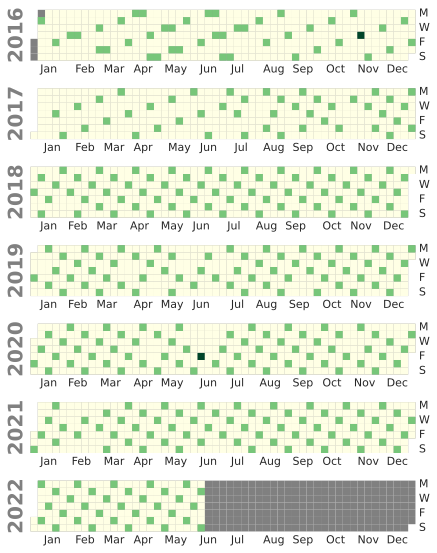

In [18]:
calendar_all_products()

Using `ipywidgets` we can visualize all the snapshot acquired in an interactive way (unfortunately, this doesn't work when exporting the notebook to HTML). Using the _index_ slider, one can select the corresponding image, and same with the _Channel_ slider. If the box _Display RGB_ is ticked, the _Channel_ slider is ignored, as the (normalized) red, green, and blue channels are automatically used to build the corresponding RGB image.

If you play a but with the widget, you will notice that many images are covered by clouds, or are completely black or white for unknown reasons. The next step in our pipeline is thus **data filtering** to remove these uninterpretable images.

In [19]:
visualize_all_products()

Output()

To filter the images that are not segmentable, or hardly readable, we simply plot the average image value distribution, across all channels. The reasonning is that interpretable images make up the majority of the dataset, and that they should have a more or less similar distribution of values across all dates. Images that are all black, or full of clouds, will appear as outliers.

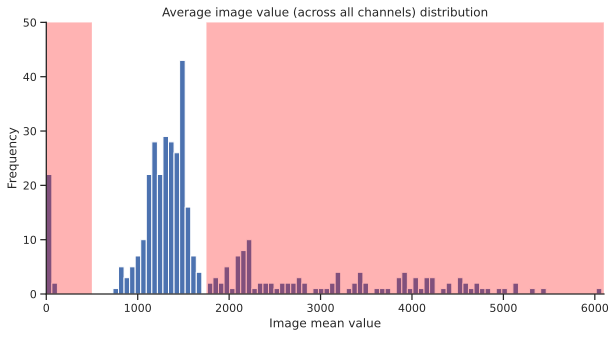

In [20]:
plot_average_image_value()

It seems that we obtain an almost Gaussian distribution of values centered on ~$1200$, with a standard deviation of around ~$500$, and then many other images with very low or very high values. After checking that the vast majority of good images are in the range of $[500, 1750]$, and, conversely, almost all images outside of this range are not desirable, we use these values as lower and upper thresholds. All images not in this range are discarded. 

We then plot again the calendar of image acquisition, and it seems that we still have a relatively well sampled time span, although not perfect.

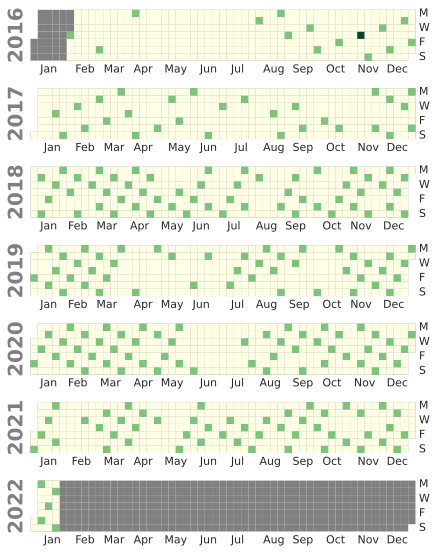

In [21]:
calendar_selected_products()

In parallel, we can visualize the final set of selected images. It appears that some images are still a bit cloudy but, overall, the dataset looks ready for trying to segment the lake.

In [22]:
visualize_selected_products()

Output()

<hr>

### Lake segmentation

In [23]:
%run "./technical_notebooks/002_data_segmentation.ipynb"

In order to segment the lake we use some _active contour modelling_ method, and precisely, the _Chan-Vese Segmentation_ algorithm. Without getting too much into details, this algorithm works well to find out the contours of closed complex shapes, preferentiably star-convex. This is the case of the lake, and it seems to yield better results than alternative methods such as the _Morphological Geodesic Active Contours_. Alternatively, we tried, without success, classifying the pixels with _random forests_, or clustering them with _K-means_ once projected in a low-dimensional space with e.g. _UMAP_ or _t-SNE_. We use channel B10 for segmentation, as, surprisingly, it seems to be the one yielding the best results.

One issue that we encountered is that the algorithm tends to find _several_ closed convex shapes to segment in the image. And when the lake is small, it's hard to tell, in an unsupervised one, which is the correct one. And sometimes, several ones are correct, as when the lake is close to getting dry, it tends to separate into small ponds. 

The first trick we apply is to simply filter out the segments whose area are less than 20% of the area of the cleanest segment we can find in the same image. It's a simple way to remove the small segments, and it seems to work well. Overall, some problematic segments still remain.

Another simple trick is simply to look at the segment in which the lake is the fullest, and discard all segments in other images that do not pertain to the area covered by this biggest segment. 

Finally, the last trick we apply is to find out what the intensity value of a pixel belonging to the lake should be, by looking at one of the cleanest segments, which we known is correct, and then compare the intensity value of the pixels belonging to other segments, to this reference value. With channel B10, the lake appears as very dark. We thus look at segments whose average value is way above the reference value, and we discard them. The difficulty is that, when the lake gets dry, it tends to get invaded by algae, whose intensity is way higher. Yet we don't want to discard these segments, as they correspond to dirty water, but still water... By trial and error, we find that a threshold of ~$1500$ works well, preserving even the segments in which the lake is full of algae. 

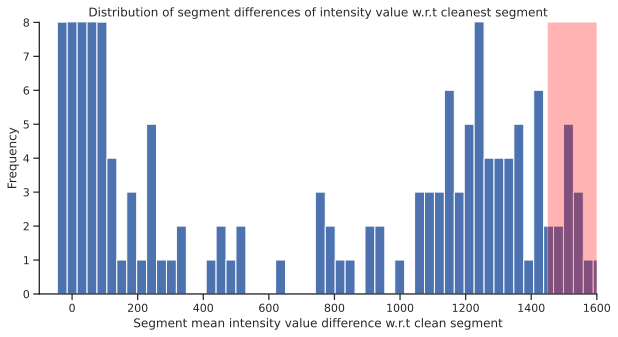

In [24]:
plot_segment_differences()

We can now plot what appears to be an excellent set of segmented images, altough everything is still not perfect.

In [25]:
visualize_segmentation()

Output()

Selected snapshots from 2017 until 2018 where the loss of water body is clear. 

<img src="assets/20171006.svg" width="500px" />
<img src="assets/20181225.svg" width="500px" />
<img src="assets/20190822.svg" width="500px" />
<img src="assets/20200314.svg" width="500px" />
<img src="assets/20210324.svg" width="500px" />
<img src="assets/20220123.svg" width="500px" />

<hr>

### Lake Dynamics

In [26]:
%run "./technical_notebooks/003_time_series_analysis.ipynb"

By calculating the total area of the lake we can study how it changes over time. To get a better idea of the dynamics, we also plot a smoothed version of the signal, which we first resample to get a regular time series, and smooth with a Savitzky-Golay filter. We obtain the figure below.

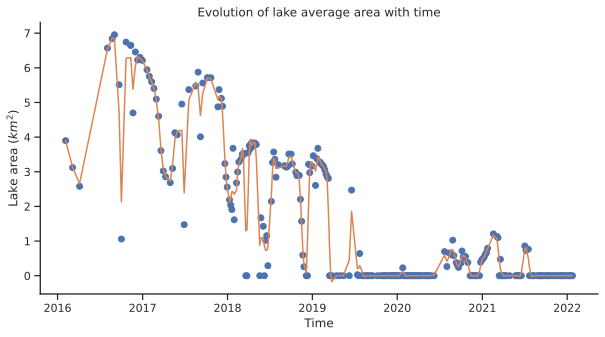

In [27]:
plot_evolution_lake_average()

It seems that some outliers still persist. Whether these outliers are due to bad segmentation, or bad images is not relevant anymore at this point, as we tried everything to keep only clean data. So we now want to discard the points that do not follow the same trend as the rest of the data, which, according to the images of the segmentation, seems to behave properly. Accordingly, we plot the compare the area from the segments with the area from the smoothed signal, and discard the segments/images that do not behave as we expect. The formula, based on relative least squares, is as follow:

$$E_i = \frac{(A_{e,i} - A_{s,i})^2}{A_{s,i}}$$ 

Where $E_i$ is the relative error of the area of segment $i$, and $A_{e,i}$ is the expected area of the segment $i$ (from the smoothed data), and $A_{s,i}$ is the area of the segment $i$ from the segmentation.

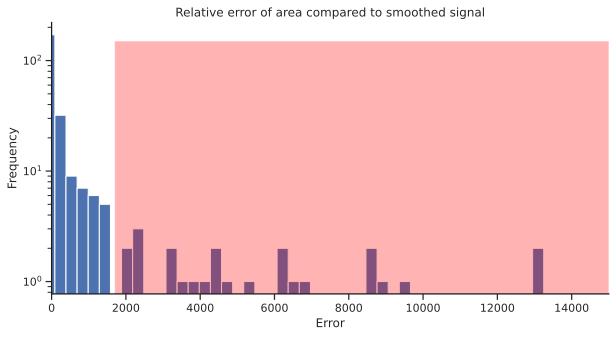

In [28]:
plot_relative_error_area()

We can now smooth a bit more the data (still using a Savitzky-Golay filter), and plot the area of the lake as a function of time with a nicer representation.

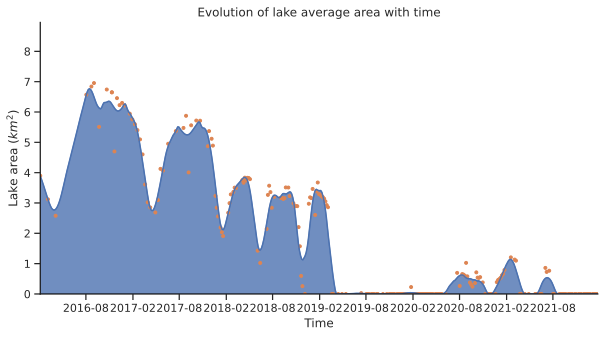

In [29]:
plot_evolution_lake_average_time()

Using channel B7, we get a proxy for the algae concentration in the lake ([Bramich et al. 2021](https://www.sciencedirect.com/science/article/pii/S1470160X20308141)).

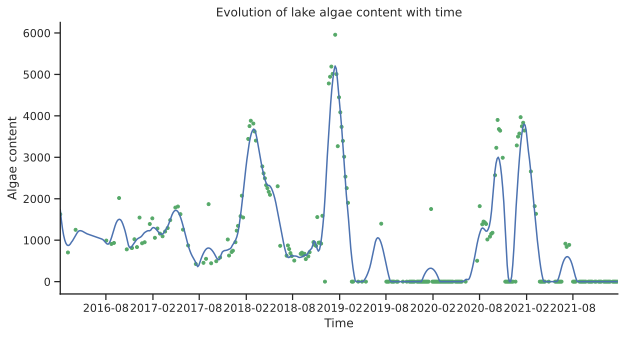

In [30]:
plot_evolution_lake_algae()

We can now merge the two plots, and it appears that the algae concentration is quite related to the area of the lake.

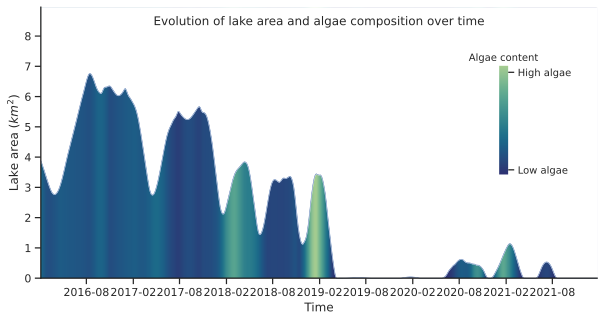

In [31]:
plot_evolution_area_algae()

<hr>

## Further work

Many questions remains open, such as:

- a) The relation between the crops around the lake and the water consumption.
- b) The correlation with rainfall datasets can explain impact of raining in the drought.
- c) The study near water bodies. Is Aculeo's lake an isolated case of is this happening in other lakes. If so, how to avoid it? 

Moreover the analysis can be drastically improved.

- a) Processing of the image to obtain bottom of the atmosphere (BOA) can improve the quality of the image.
- b) A better algorithm to detect clouds in the images can filter out products with high cloud coverage in the AOI
- c) A machine learning based algorithm to segment the water body can led to more accurate segmentation. 
- d) Increase of products available by combining Sentinel-2 with data from other providers such as Landsat. 

<hr>

## Conclusion

Public repositories of remote sensing products such as the ones provided by the Sentinel missions offer an excellent opportunity to monitor the impact of climate change on our environment. For Aculeo's lake could be too late, but real-time monitoring analysis of wetlands using satellite imagery can be used to predict critical situations that require urgent action by society. This technology can potentially become the tool that makes the difference between losing or saving our planet as we know it.

<hr>

## Bibliography

- Garreaud, R., Álvarez-Garretón, C., Barichivich, J., Boisier, J.P., Christie, D.A., Galleguillos, M., LeQuesne, C., McPhee, J., Zambrano-Bigiarini, M. (2017). The 2010-2015 mega drought in Central Chile: Impacts on regional hydroclimate and vegetation. Hydrol. Earth Syst. Sci., 21, 1–21. https://doi.org/10.5194/hess-21-1-2017 

- DGAC (2019) Dirección Meteorologíca de Chile – septiembre 2019. Boletin Climatologico Mensual. Monitoreo de la sequía meteorologíca de Chile. Chile: Oficina de Servicios Climatologicos. https://climatologia.meteochile.gob.cl/application/publicaciones/documentoPdf/boletinClimatologicoMensual/boletinClimatologicoMensual201909.pdf 

- Silva, PC (2017) Evaluación del sistema socio-ecológico de la Cuenca de Aculeo en la comuna de Paine, Región Metropolitana. Tesis para optar al grado de magíster en Gestión y Planificación Ambiental. Universidad de Chile URL: http://mgpa.forestaluchile.cl/Tesis/Silva%20Patricia.pdf 

- Valdés-Pineda, R.; Garcia-Chevesich, P.A.; Alaniz, A.J.; Venegas-Quiñones, H.L.; Valdés, J.B.; Pizarro, R. (2022). The Impact of a Lack of Government Strategies for Sustainable Water Management and Land Use Planning on the Hydrology of Water Bodies: Lessons Learned from the Disappearance of the Aculeo Lagoon in Central Chile, Sustainability 14, no. 1: 413. https://doi.org/10.3390/su14010413 

- Alaniz, A., Carvajal, M., Núñez-Hidalgo, I., & Vergara, P. (2019). Chronicle of an Environmental Disaster: Aculeo Lake, the Collapse of the Largest Natural Freshwater Ecosystem in Central Chile. Environmental Conservation, 46(3), 201-204. http://doi:10.1017/S0376892919000122 

- Campbell N. D’Arcy B., Frost A., Novotny V. and Sansom A., (2004). Diffuse pollution: An introduction to the problems and solutions. London: IWA Publishing. https://www.iwapublishing.com/books/9781900222532/diffuse-pollution 

- Sustainability and climate change agency. (2019). Agencia de sustentabilidad y cambio climático. Acuerdo territorial voluntario para la gestión de la Cuenca de Aculeo. Diagnóstico y propuestas para la conservación de la laguna de Aculeo. Presentación, Consejo Municipal 21.01.2019

- Castro Romero, M., Lardiés Bosque, R. (2002). Movilidad espacial y trabajo agrícola de la población residente en el distrito de la Laguna de Aculeo, Chile, Scripta Nova, Revista electrónica de geografía y ciencias sociales, Vol. VI, num. 119 (40) http://www.ub.edu/geocrit/sn/sn119-40.htm 

- Jenny, B., Valero-Garcés, B.L., Villa-Martínez, R., Urrutia, R., Geyh, M. y Veit, H. (2002). Early to Mid-Holocene Aridity in Central Chile and the Southern Westerlies: The Laguna Aculeo Record (34◦S), Quaternary Research, 58, 160–170. https://doi.org/10.1006/qres.2002.2370 

<hr>

**Portrait of a lake's death** *by [Colas Droin](colasdroin.github.io) (EPFL), [Diana Zambelloni](https://www.linkedin.com/in/diana-zambelloni-0b346b155/en/?originalSubdomain=it) (EPFL), and [Carlos Vivar Rios](h4ck1ng.science) (h4cking.science).*

Project developed for the Jupyter Notebook Competition by [Wekeo](https://notebook.wekeo.eu/). MIT License 2022.
